In [72]:
import matplotlib.pyplot as plt
import numpy as np

#load pymatgen for reading the vasp files? 
import sys, os, json
sys.path.append('../Modules/')
from pymatgen.io.vasp import Outcar, Poscar
from pymatgen.io.cif import CifWriter
from pymatgen.core import Structure

In [62]:
from VASPDataParser import VASPDataParser


In [65]:
data_path = '../Archived_Vasp_Jobs/Finished_VCrTiWZr_PostMCMC'

In [66]:
# go through each job_x folder and read the data
# store the data in a dictionary
# the key is the job number, the value is the data, we will need to eventually write the data into an xyz file 

# get the name of folders in the directory 
folders = os.listdir(data_path)
folders = [f for f in folders if 'job' in f]

In [68]:
save_dir = '../Visualization/Job_Structures/Post_VASP/'
# go through each folder and read the data 
for folder in folders:
    # get the number from the folder name, i.e for job_19 the number is 19
    job_number = int(folder.split('_')[1])
    # check in the folder if POSCAR-original exists, if it does set the poscar path to the POSCAR-original file
    # if it does not exist, set the poscar path to the POSCAR file
    poscar_path = os.path.join(data_path, folder, 'POSCAR-original')
    if not os.path.exists(poscar_path):
        poscar_path = os.path.join(data_path, folder, 'POSCAR')
    # read the data from the OUTCAR file
    outcar_path = os.path.join(data_path, folder, 'OUTCAR')

    # read the data from the OUTCAR file using pymatgen 
    poscar = Poscar.from_file(poscar_path)
    outcar = Outcar(outcar_path)
    print(outcar.final_energy_wo_entrp)

    # save the initial and final structures as cif files 
    initial_cif = CifWriter(poscar.structure)
    total_initial_path = os.path.join(save_dir,f'job_{job_number}_initial.cif')
    initial_cif.write_file(total_initial_path)

    contcar_path = os.path.join(data_path, folder, 'CONTCAR')
    contcar = Poscar.from_file(contcar_path)
    final_cif = CifWriter(contcar.structure)
    total_final_path = os.path.join(save_dir,f'job_{job_number}_final.cif')
    final_cif.write_file(total_final_path)



-581.16278527
-578.94282909
-581.22857644
-588.61486221
-571.52073957
-578.6889915
-583.79339547
-584.16971374
-578.88348398
-581.9926566
-578.00202417
-582.02446826
-575.83422332
-594.08493181
-593.758195
-584.92031315
-570.80808847
-575.71211583
-589.79777179
-579.50771277
-584.49619907
-583.53743847
-584.92789208
-589.68641086
-577.85875857
-588.87932048


In [69]:
vasp_data = {}
# go through each folder and read the data 
for folder in folders:
    # get the number from the folder name, i.e for job_19 the number is 19
    job_number = int(folder.split('_')[1])
    # check in the folder if POSCAR-original exists, if it does set the poscar path to the POSCAR-original file
    # if it does not exist, set the poscar path to the POSCAR file
    poscar_path = os.path.join(data_path, folder, 'POSCAR-original')
    if not os.path.exists(poscar_path):
        poscar_path = os.path.join(data_path, folder, 'POSCAR')
    # read the data from the OUTCAR file
    outcar_path = os.path.join(data_path, folder, 'OUTCAR')

    contcar_path = os.path.join(data_path, folder, 'CONTCAR')

    # read the data from the OUTCAR file using pymatgen 
    poscar = Poscar.from_file(poscar_path)
    num_atoms = len(poscar.structure.sites)
    contcar = Poscar.from_file(contcar_path)

    parser = VASPDataParser()

    # read the data from the OUTCAR file using the parser 
    forces = parser.get_forces(outcar_path)[-1]
    energy = parser.get_energy_without_entropy(outcar_path)[-1]
    
    print(energy*num_atoms)


    vasp_data[str(job_number)] = {'energy': energy, 'forces': forces, 'initial_structure' : poscar.structure.as_dict(), 'final_structure' : contcar.structure.as_dict()}

# save the vasp data 
with open(os.path.join(save_dir,'vasp_data.json'), 'w') as f:
    json.dump(vasp_data, f)



-581.16278527
-578.94282909
-581.22857644
-588.61486221
-571.52073957
-578.6889915
-583.79339547
-584.16971374
-578.88348398
-581.9926566
-578.00202417
-582.02446826
-575.83422332
-594.08493181
-593.758195
-584.92031315
-570.80808847
-575.71211583
-589.79777179
-579.50771277
-584.49619907
-583.53743847
-584.92789208
-589.68641086
-577.85875857
-588.87932048


In [70]:
#compare the energy of CE and VASP 
from smol.io import load_work

# read the data from the CE

ce_data_path = '../Visualization/Job_Structures/Pre_VASP'
structures_file = '../Archived_Vasp_Jobs/VCrTiWZr_PostMCMC/structure_dict.json'

# get all .mson files in the directory
ce_files = os.listdir(ce_data_path)
ce_files = [f for f in ce_files if '.mson' in f]

ce_data = {}
# read the data from the CE
for file in ce_files:
    print(file)
    samples = load_work(os.path.join(ce_data_path, file))
    energies = samples['SampleContainer'].get_energies()
    #structures = samples['SampleContainer'].get_sampled_structures()
    initial_structure = samples['SampleContainer'].get_sampled_structures(indices=[0])[0]
    final_structure = samples['SampleContainer'].get_sampled_structures(indices=[-1])[0]
    initial_energy = energies[0]
    final_energy = energies[-1]
    ce_data[file] = {'initial_energy': initial_energy, 'final_energy': final_energy, 'initial_structure': initial_structure, 'final_structure': final_structure}


Cr0_0384-Ti0_0341-Zr0_0184-W0_0949-V0_8142_samples.mson
Cr0_034-Ti0_0943-Zr0_0359-W0_0648-V0_771_samples.mson
Cr0_0172-Ti0_031-Zr0_014-W0_035-V0_9028_samples.mson
Cr0_0991-Ti0_0676-Zr0_0323-W0_0716-V0_7294_samples.mson
Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_samples.mson
Cr0_0889-Ti0_0383-Zr0_0362-W0_0456-V0_791_samples.mson
Cr0_0124-Ti0_0279-Zr0_036-W0_059-V0_8647_samples.mson
Cr0_048-Ti0_0127-Zr0_0187-W0_0555-V0_8651_samples.mson
Cr0_0734-Ti0_0141-Zr0_0191-W0_036-V0_8574_samples.mson
Cr0_0846-Ti0_0657-Zr0_0445-W0_062-V0_7432_samples.mson
Cr0_0961-Ti0_0403-Zr0_0137-W0_0187-V0_8312_samples.mson
Cr0_0859-Ti0_0798-Zr0_0192-W0_0129-V0_8022_samples.mson
Cr0_0675-Ti0_0123-Zr0_021-W0_0301-V0_8691_samples.mson


In [73]:
energies = []
structures_dict = json.load(open(structures_file, 'r'))
for job_number, cif_file in structures_dict.items():
    # get the base name of the cif file without the extension 
    base_name = os.path.splitext(cif_file)[0]
    print(base_name)

    # check if the base name contains initial or final 
    if 'initial' in base_name:
        # remove the _initial from the base name
        base_name = base_name.replace('_initial', '')
        # get the energy from the CE data
        energy = ce_data[base_name+'_samples.mson']['initial_energy']
    elif 'final' in base_name:
        # remove the _final from the base name 
        base_name = base_name.replace('_final', '')
        # get the energy from the CE data
        energy = ce_data[base_name+'_samples.mson']['final_energy']
    else:
        print('Error in the file name')
        break

    # get the vasp energy corresponding to the correct job number
    vasp_energy = vasp_data[job_number]['energy']*len(Structure.from_dict(vasp_data[job_number]['initial_structure']).sites)

    energies.append((energy, vasp_energy))

Cr0_0991-Ti0_0676-Zr0_0323-W0_0716-V0_7294_final
Cr0_0734-Ti0_0141-Zr0_0191-W0_036-V0_8574_initial
Cr0_0384-Ti0_0341-Zr0_0184-W0_0949-V0_8142_initial
Cr0_048-Ti0_0127-Zr0_0187-W0_0555-V0_8651_initial
Cr0_0124-Ti0_0279-Zr0_036-W0_059-V0_8647_final
Cr0_0991-Ti0_0676-Zr0_0323-W0_0716-V0_7294_initial
Cr0_0734-Ti0_0141-Zr0_0191-W0_036-V0_8574_final
Cr0_0384-Ti0_0341-Zr0_0184-W0_0949-V0_8142_final
Cr0_0859-Ti0_0798-Zr0_0192-W0_0129-V0_8022_initial
Cr0_0859-Ti0_0798-Zr0_0192-W0_0129-V0_8022_final
Cr0_0124-Ti0_0279-Zr0_036-W0_059-V0_8647_initial
Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_initial
Cr0_0889-Ti0_0383-Zr0_0362-W0_0456-V0_791_initial
Cr0_0961-Ti0_0403-Zr0_0137-W0_0187-V0_8312_final
Cr0_0923-Ti0_0513-Zr0_0206-W0_0322-V0_8036_final
Cr0_034-Ti0_0943-Zr0_0359-W0_0648-V0_771_final
Cr0_048-Ti0_0127-Zr0_0187-W0_0555-V0_8651_final
Cr0_0846-Ti0_0657-Zr0_0445-W0_062-V0_7432_initial
Cr0_034-Ti0_0943-Zr0_0359-W0_0648-V0_771_initial
Cr0_0675-Ti0_0123-Zr0_021-W0_0301-V0_8691_initial
Cr0_0846-Ti0_

In [74]:
# get the MAE 
mae = sum(abs(predicted - ground_truth) for predicted, ground_truth in energies) / len(energies)
actual_mae = mae/num_atoms*1000 
print('MAE (in meV/atom):', actual_mae)
# print the energies 
for energy in energies:
    print(energy)

MAE (in meV/atom): 1.7590222353957274
(-589.9984512521613, -589.79777179)
(-581.907615474905, -581.9926566)
(-593.6903184360876, -593.758195)
(-588.7218076016867, -588.61486221)
(-584.8079743726912, -584.92031315)
(-589.6962693694097, -589.68641086)
(-582.0238879797945, -582.02446826)
(-593.8891080497806, -594.08493181)
(-570.8854460491581, -570.80808847)
(-571.5231321229769, -571.52073957)
(-584.853923757379, -584.92789208)
(-578.7361275702305, -578.6889915)
(-583.8266962369322, -583.79339547)
(-575.5463654104441, -575.71211583)
(-579.0474405077521, -578.94282909)
(-579.9155633268205, -579.50771277)
(-588.8689965850299, -588.87932048)
(-583.7137532708598, -583.53743847)
(-579.4298665681811, -578.88348398)
(-581.2422948007415, -581.16278527)
(-584.38636383102, -584.16971374)
(-577.9299145403281, -578.00202417)
(-581.2424596854355, -581.22857644)
(-577.8627200897655, -577.85875857)
(-584.4468389963461, -584.49619907)
(-575.7672172506468, -575.83422332)


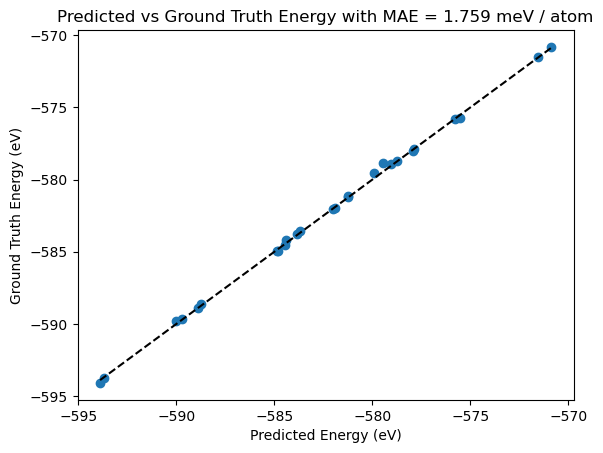

In [75]:
predicted_energies, ground_truth_energies = zip(*energies)
plt.scatter(predicted_energies, ground_truth_energies)
plt.plot([min(predicted_energies), max(predicted_energies)], [min(predicted_energies), max(predicted_energies)], 'k--')
plt.xlabel('Predicted Energy (eV)')
plt.ylabel('Ground Truth Energy (eV)')
plt.title(f'Predicted vs Ground Truth Energy with MAE = {round(actual_mae,3)} meV / atom')
plt.show()